In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Load train and test data
data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\data.csv")
train_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\train_data.csv")
test_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\test_data.csv")

In [3]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

In [4]:
# Créer le vecteur "JoursAssurées"
JoursAssurées = ((test_data["max_generation(mw)"] - test_data["total_demand(mw)"]) > 0).values
JoursAssurées

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,

In [5]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("=> La série est stationnaire selon le test ADF (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).\n")

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    
    if kpsstest[1] < 0.05:
        print("=> La série n'est PAS stationnaire selon le test KPSS (p-value < 0.05).\n")
    else:
        print("=> La série est stationnaire selon le test KPSS (p-value >= 0.05).\n")

def pp_test(timeseries):
    print('Results of PP Test:')
    pptest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(pptest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in pptest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if pptest[1] < 0.05:
        print("=> La série est stationnaire selon le test PP (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test PP (p-value >= 0.05).\n")

## Application du model SARIMA

### La demande totale

In [ ]:
ts_data1 = train_data["total_demand(mw)"]

In [6]:
adf_test(ts_data1)
kpss_test(ts_data1)
pp_test(ts_data1)

Results of Dickey-Fuller Test:
Test Statistic                   -2.806991
p-value                           0.057282
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64
=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).

Results of KPSS Test:
Test Statistic            0.306275
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -2.872973
p-value                           0.171433
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.96

C:\Users\Idea\AppData\Local\Temp\ipykernel_15528\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [7]:
# Différencier la série une fois
ts_data_diff1 = ts_data1.diff().dropna()

In [ ]:
# les tests pour la serie différencié
adf_test(ts_data_diff1)
kpss_test(ts_data_diff1)
pp_test(ts_data_diff1)

Results of Dickey-Fuller Test:
Test Statistic                -9.194083e+00
p-value                        2.085345e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic             0.136847
p-value                    0.100000
#Lags Used               290.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                -9.191650e+00
p-value                        1.344408e-13
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)        

C:\Users\Idea\AppData\Local\Temp\ipykernel_15528\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


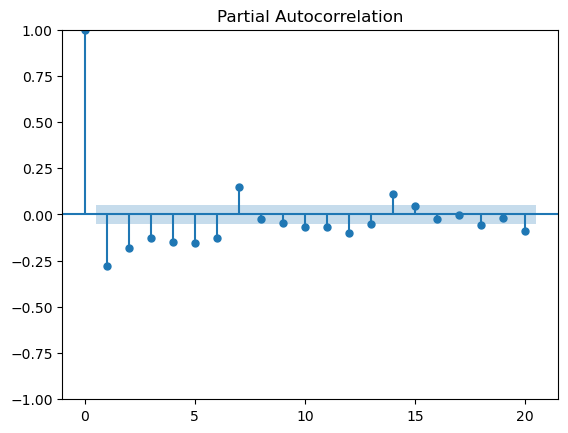

In [9]:
plot_pacf(ts_data_diff1, lags=20)
plt.show()

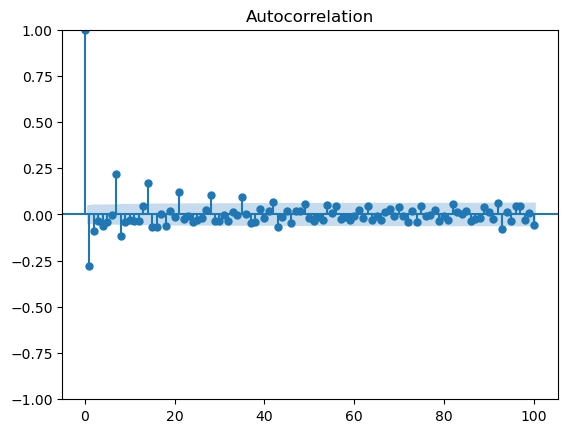

In [10]:
plot_acf(ts_data_diff1, lags=100)
plt.show()

In [11]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [13]:
# Fit the SARIMA model
sarima_model1 = SARIMAX(train_data_last_730_days1['total_demand(mw)'], order=(1, 0, 1), seasonal_order=(0, 1, 0, 365))
sarima_model_fit1 = sarima_model1.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit1.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                     total_demand(mw)   No. Observations:                  730
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 365)   Log Likelihood               -3049.995
Date:                              Mon, 28 Apr 2025   AIC                           6105.989
Time:                                      23:27:13   BIC                           6117.689
Sample:                                           0   HQIC                          6110.639
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8415      0.013     63.771      0.000       0.816       0.867
ma.L1         -0.23

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


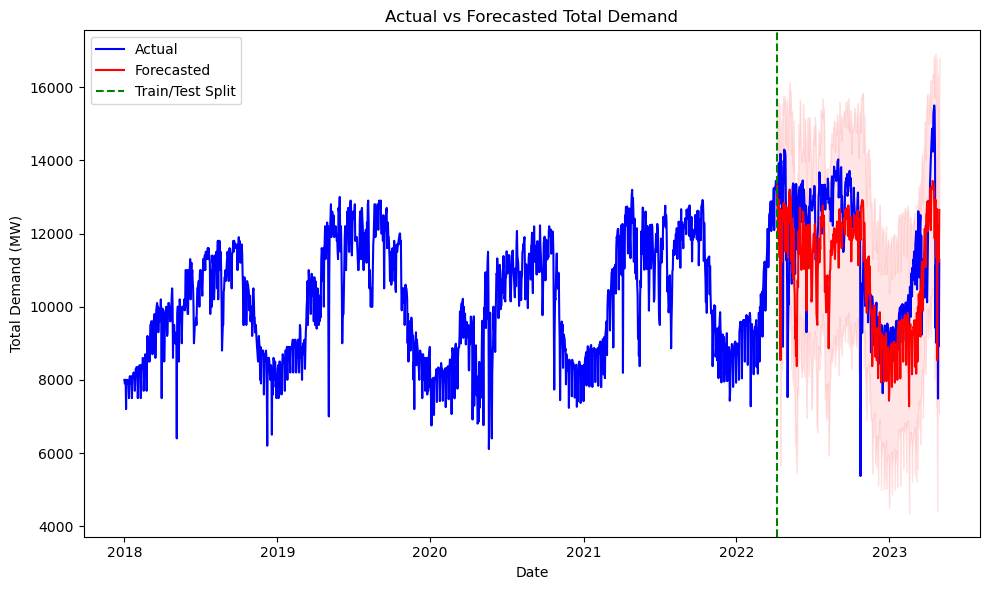

In [15]:
# Get the forecast for the test period
sarima_test_forecast1 = sarima_model_fit1.get_forecast(steps=len(test_data))
forecast_values_1 = sarima_test_forecast1.predicted_mean

# Get confidence intervals if needed
forecast_ci1 = sarima_test_forecast1.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['total_demand(mw)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_1, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci1.iloc[:, 0],  # Lower bound
                 forecast_ci1.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.title('Actual vs Forecasted Total Demand')
plt.legend()
plt.tight_layout()
plt.show()

#### Precision pour model SARIMA consomation

In [ ]:
JoursAssuréesPredit = ((test_data["max_generation(mw)"] - forecast_values_1) > 0).values

In [46]:
count=0
for i in range(0, len(JoursAssurées)):
    if JoursAssurées[i] == JoursAssuréesPredit[i]:
        count = count + 1
print("La précision est ", count/len(JoursAssurées) * 100, "%")

La précision est  18.997361477572557 %


### La temp2_max(c)

In [6]:
ts_data2 = train_data["temp2_max(c)"]

In [7]:
adf_test(ts_data2)
kpss_test(ts_data2)
pp_test(ts_data2)

Results of Dickey-Fuller Test:
Test Statistic                   -3.712604
p-value                           0.003939
#Lags Used                       22.000000
Number of Observations Used    1492.000000
Critical Value (1%)              -3.434740
Critical Value (5%)              -2.863479
Critical Value (10%)             -2.567802
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.095995
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -3.720598
p-value                           0.021036
#Lags Used                       22.000000
Number of Observations Used    1492.000000
Critical Value (1%)              -3.964851
Cr

C:\Users\Idea\AppData\Local\Temp\ipykernel_14936\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


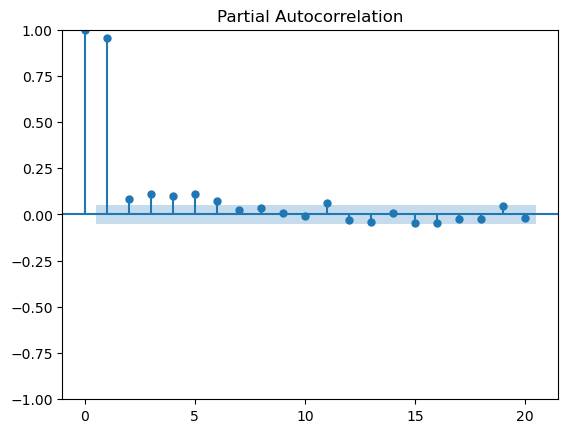

In [8]:
plot_pacf(ts_data2, lags=20)
plt.show()

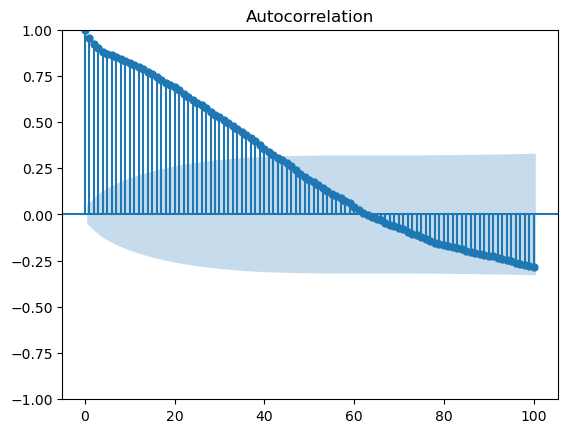

In [9]:
plot_acf(ts_data2, lags=100)
plt.show()

In [10]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [11]:
# Fit the SARIMA model
sarima_model2 = SARIMAX(train_data_last_730_days1['temp2_max(c)'], order=(2, 0, 1), seasonal_order=(0, 1, 0, 365))
sarima_model_fit2 = sarima_model2.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit2.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  w

                                      SARIMAX Results                                       
Dep. Variable:                         temp2_max(c)   No. Observations:                  730
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 365)   Log Likelihood                -686.907
Date:                              Tue, 06 May 2025   AIC                           1381.813
Time:                                      01:10:15   BIC                           1397.413
Sample:                                           0   HQIC                          1388.013
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0982      0.242      0.406      0.685      -0.376       0.573
ar.L2          0.41

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


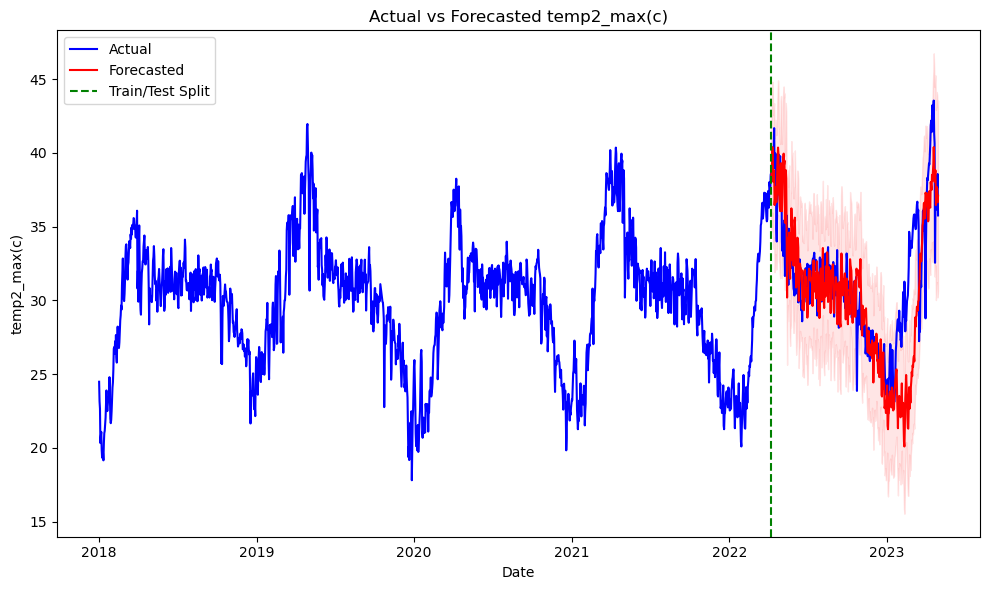

In [12]:
# Get the forecast for the test period
sarima_test_forecast2 = sarima_model_fit2.get_forecast(steps=len(test_data))
forecast_values_2 = sarima_test_forecast2.predicted_mean

# Get confidence intervals if needed
forecast_ci2 = sarima_test_forecast2.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['temp2_max(c)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_2, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci2.iloc[:, 0],  # Lower bound
                 forecast_ci2.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('temp2_max(c)')
plt.title('Actual vs Forecasted temp2_max(c)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(test_data['temp2_max(c)'], forecast_values_2))
print(f"RMSE for temp2_max(c): {rmse2}")

RMSE for temp2_max(c): 3.4302699290181637


### La temp2_min(c)

In [6]:
ts_data3 = train_data["temp2_min(c)"]

In [7]:
adf_test(ts_data3)
kpss_test(ts_data3)
pp_test(ts_data3)

Results of Dickey-Fuller Test:
Test Statistic                   -2.960587
p-value                           0.038743
#Lags Used                       20.000000
Number of Observations Used    1494.000000
Critical Value (1%)              -3.434735
Critical Value (5%)              -2.863477
Critical Value (10%)             -2.567801
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.106817
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -2.985144
p-value                           0.136282
#Lags Used                       20.000000
Number of Observations Used    1494.000000
Critical Value (1%)              -3.964842
Cr

C:\Users\Idea\AppData\Local\Temp\ipykernel_172\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


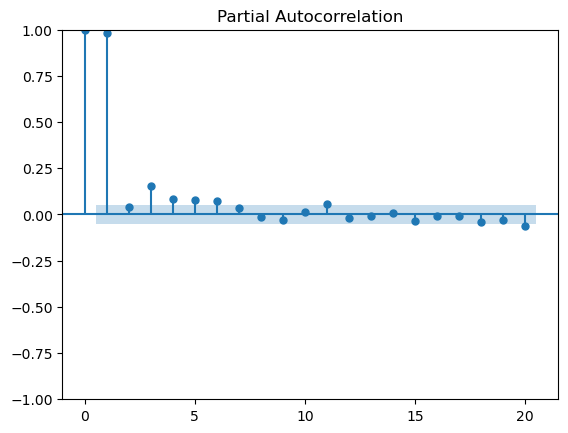

In [8]:
plot_pacf(ts_data3, lags=20)
plt.show()

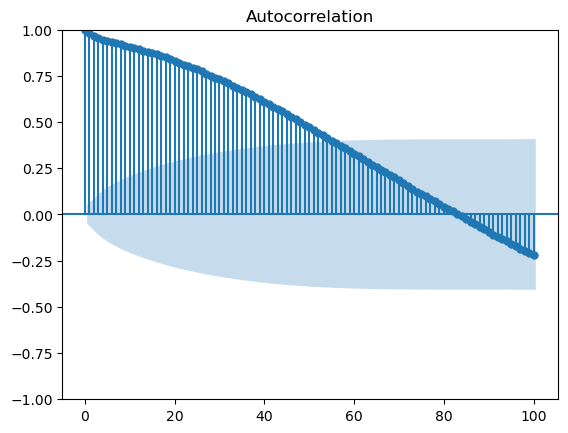

In [9]:
plot_acf(ts_data3, lags=100)
plt.show()

In [10]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [11]:
# Fit the SARIMA model
sarima_model3 = SARIMAX(train_data_last_730_days1['temp2_min(c)'], order=(2, 0, 1), seasonal_order=(0, 1, 0, 365))
sarima_model_fit3 = sarima_model3.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit3.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                         temp2_min(c)   No. Observations:                  730
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 365)   Log Likelihood                -624.635
Date:                              Tue, 06 May 2025   AIC                           1257.271
Time:                                      01:19:02   BIC                           1272.871
Sample:                                           0   HQIC                          1263.470
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9835      0.334      2.944      0.003       0.329       1.638
ar.L2         -0.19

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


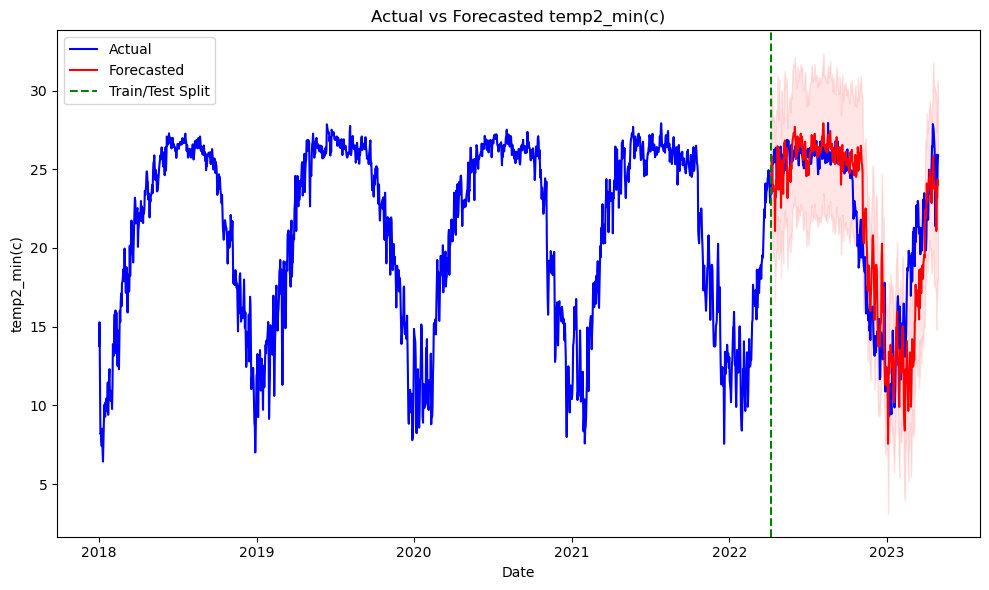

In [12]:
# Get the forecast for the test period
sarima_test_forecast3 = sarima_model_fit3.get_forecast(steps=len(test_data))
forecast_values_3 = sarima_test_forecast3.predicted_mean

# Get confidence intervals if needed
forecast_ci3 = sarima_test_forecast3.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['temp2_min(c)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_3, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci3.iloc[:, 0],  # Lower bound
                 forecast_ci3.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('temp2_min(c)')
plt.title('Actual vs Forecasted temp2_min(c)')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse3 = np.sqrt(mean_squared_error(test_data['temp2_min(c)'], forecast_values_3))
print(f"RMSE for temp2_max(c): {rmse3}")

RMSE for temp2_max(c): 2.8193449546077876


### La temp2_ave(c)

In [15]:
ts_data4 = train_data["temp2_ave(c)"]

In [16]:
adf_test(ts_data4)
kpss_test(ts_data4)
pp_test(ts_data4)

Results of Dickey-Fuller Test:
Test Statistic                   -3.328751
p-value                           0.013641
#Lags Used                       20.000000
Number of Observations Used    1494.000000
Critical Value (1%)              -3.434735
Critical Value (5%)              -2.863477
Critical Value (10%)             -2.567801
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.100928
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -3.347263
p-value                           0.058843
#Lags Used                       20.000000
Number of Observations Used    1494.000000
Critical Value (1%)              -3.964842
Cr

C:\Users\Idea\AppData\Local\Temp\ipykernel_172\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


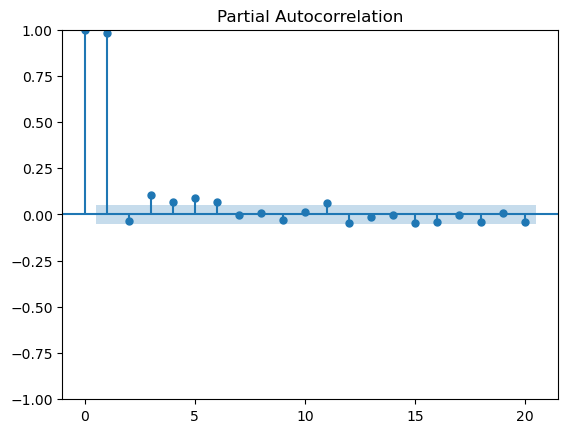

In [18]:
plot_pacf(ts_data4, lags=20)
plt.show()

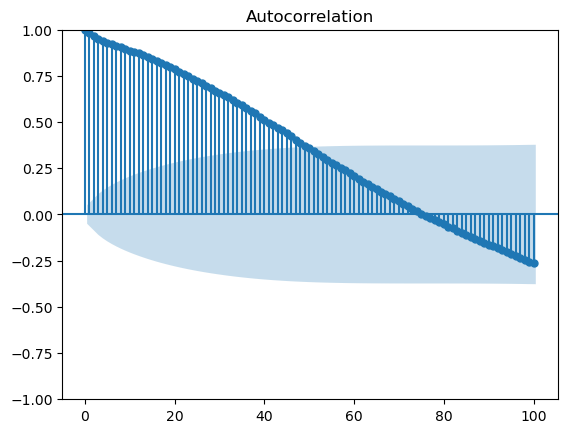

In [19]:
plot_acf(ts_data4, lags=100)
plt.show()

In [20]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [21]:
# Fit the SARIMA model
sarima_model4 = SARIMAX(train_data_last_730_days1['temp2_ave(c)'], order=(2, 0, 1), seasonal_order=(0, 1, 0, 365))
sarima_model_fit4 = sarima_model4.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit4.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                         temp2_ave(c)   No. Observations:                  730
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 365)   Log Likelihood                -552.146
Date:                              Tue, 06 May 2025   AIC                           1112.292
Time:                                      01:29:16   BIC                           1127.892
Sample:                                           0   HQIC                          1118.492
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3887      0.220      1.770      0.077      -0.042       0.819
ar.L2          0.32

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


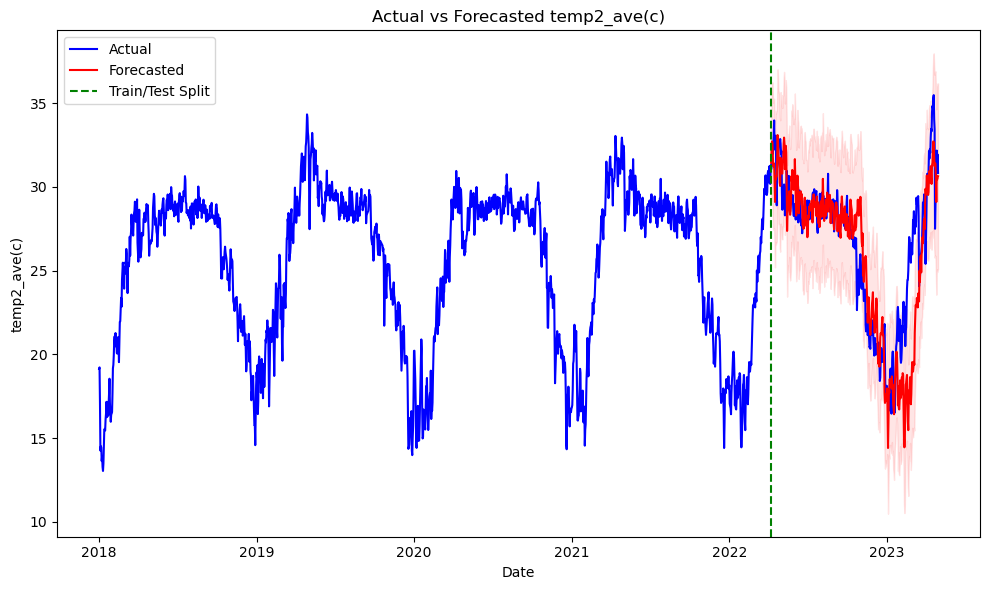

In [22]:
# Get the forecast for the test period
sarima_test_forecast4 = sarima_model_fit4.get_forecast(steps=len(test_data))
forecast_values_4 = sarima_test_forecast4.predicted_mean

# Get confidence intervals if needed
forecast_ci4 = sarima_test_forecast4.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['temp2_ave(c)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_4, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci4.iloc[:, 0],  # Lower bound
                 forecast_ci4.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('temp2_ave(c)')
plt.title('Actual vs Forecasted temp2_ave(c)')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse3 = np.sqrt(mean_squared_error(test_data['temp2_ave(c)'], forecast_values_4))
print(f"RMSE for temp2_max(c): {rmse3}")

RMSE for temp2_max(c): 2.762056332799832


### suface_pressure(pa)

In [ ]:
ts_data5 = train_data["suface_pressure(pa)"]

In [ ]:
adf_test(ts_data5)
kpss_test(ts_data5)
pp_test(ts_data5)

Results of Dickey-Fuller Test:
Test Statistic                   -3.085648
p-value                           0.027634
#Lags Used                        7.000000
Number of Observations Used    1507.000000
Critical Value (1%)              -3.434697
Critical Value (5%)              -2.863460
Critical Value (10%)             -2.567792
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.111926
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -3.117921
p-value                           0.102031
#Lags Used                        7.000000
Number of Observations Used    1507.000000
Critical Value (1%)              -3.964790
Cr

C:\Users\Idea\AppData\Local\Temp\ipykernel_20896\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


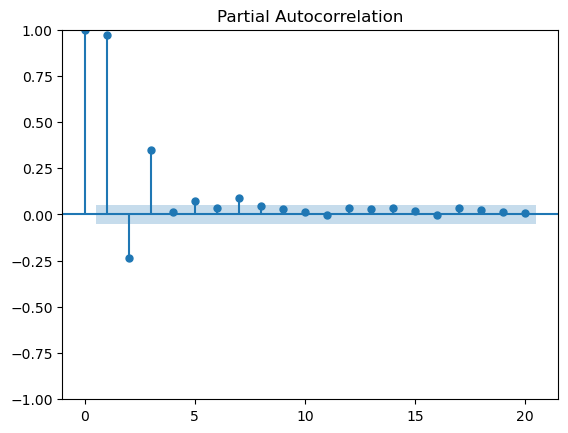

In [ ]:
plot_pacf(ts_data5, lags=20)
plt.show()

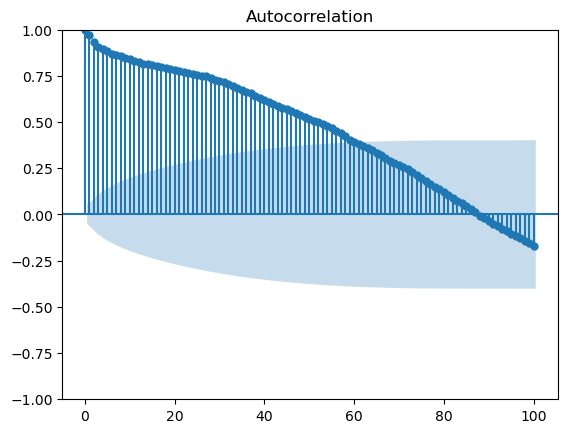

In [ ]:
plot_acf(ts_data5, lags=100)
plt.show()

In [ ]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [ ]:
# Fit the SARIMA model
sarima_model5 = SARIMAX(train_data_last_730_days1['suface_pressure(pa)'], order=(4, 0, 1), seasonal_order=(0, 1, 0, 365))
sarima_model_fit5 = sarima_model5.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit5.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                  suface_pressure(pa)   No. Observations:                  730
Model:             SARIMAX(4, 0, 1)x(0, 1, [], 365)   Log Likelihood                 134.182
Date:                              Tue, 06 May 2025   AIC                           -256.364
Time:                                      01:43:45   BIC                           -232.965
Sample:                                           0   HQIC                          -247.065
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3093      0.328      3.994      0.000       0.667       1.952
ar.L2         -0.82

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


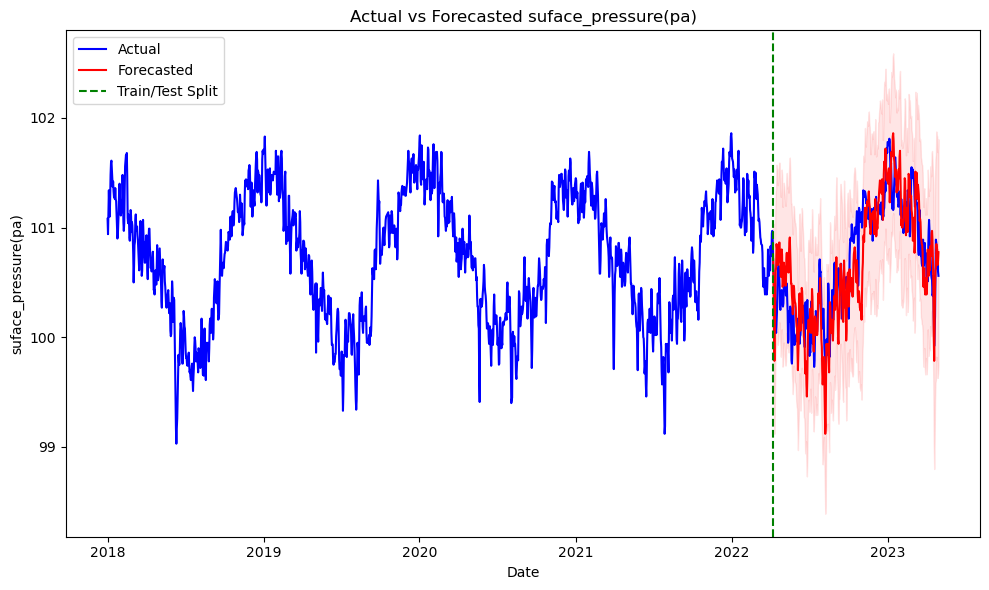

In [ ]:
# Get the forecast for the test period
sarima_test_forecast5 = sarima_model_fit5.get_forecast(steps=len(test_data))
forecast_values_5 = sarima_test_forecast5.predicted_mean

# Get confidence intervals if needed
forecast_ci5 = sarima_test_forecast5.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['suface_pressure(pa)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_5, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci5.iloc[:, 0],  # Lower bound
                 forecast_ci5.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('suface_pressure(pa)')
plt.title('Actual vs Forecasted suface_pressure(pa)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse3 = np.sqrt(mean_squared_error(test_data['suface_pressure(pa)'], forecast_values_5))
print(f"RMSE for temp2_max(c): {rmse3}")

RMSE for temp2_max(c): 0.3274013216533342


### wind_speed50_max(m/s)

In [16]:
ts_data6 = train_data["wind_speed50_max(m/s)"]

In [17]:
adf_test(ts_data6)
kpss_test(ts_data6)
pp_test(ts_data6)

Results of Dickey-Fuller Test:
Test Statistic                -6.009656e+00
p-value                        1.584622e-07
#Lags Used                     1.000000e+01
Number of Observations Used    1.504000e+03
Critical Value (1%)           -3.434705e+00
Critical Value (5%)           -2.863464e+00
Critical Value (10%)          -2.567794e+00
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.086644
p-value                   0.100000
#Lags Used               22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -6.006390
p-value                           0.000002
#Lags Used                       10.000000
Number of Observations Used    1504.000000
Critical Value (1%)              -3.96

C:\Users\Idea\AppData\Local\Temp\ipykernel_20896\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


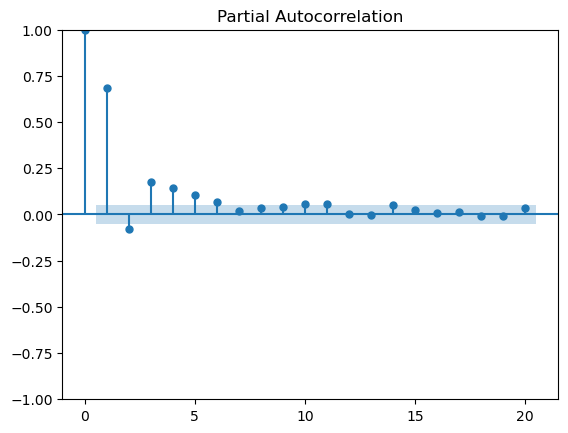

In [18]:
plot_pacf(ts_data6, lags=20)
plt.show()

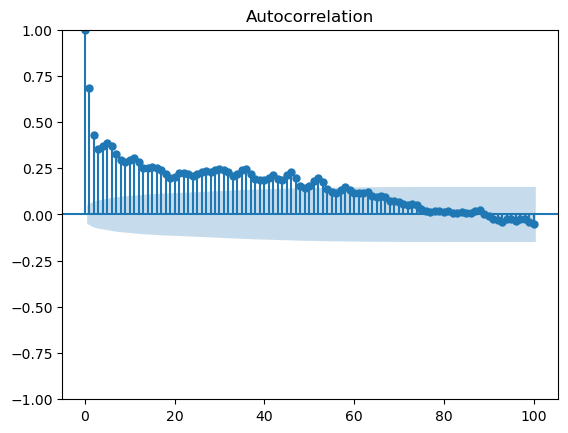

In [19]:
plot_acf(ts_data6, lags=100)
plt.show()

In [20]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [22]:
# Fit the SARIMA model
sarima_model6 = SARIMAX(train_data_last_730_days1['wind_speed50_max(m/s)'], order=(2, 0, 3), seasonal_order=(0, 1, 0, 365))
sarima_model_fit6 = sarima_model6.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit6.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                wind_speed50_max(m/s)   No. Observations:                  730
Model:             SARIMAX(2, 0, 3)x(0, 1, [], 365)   Log Likelihood                -800.473
Date:                              Tue, 06 May 2025   AIC                           1612.945
Time:                                      01:51:33   BIC                           1636.344
Sample:                                           0   HQIC                          1622.244
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5048      0.521      0.969      0.333      -0.516       1.526
ar.L2          0.30

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


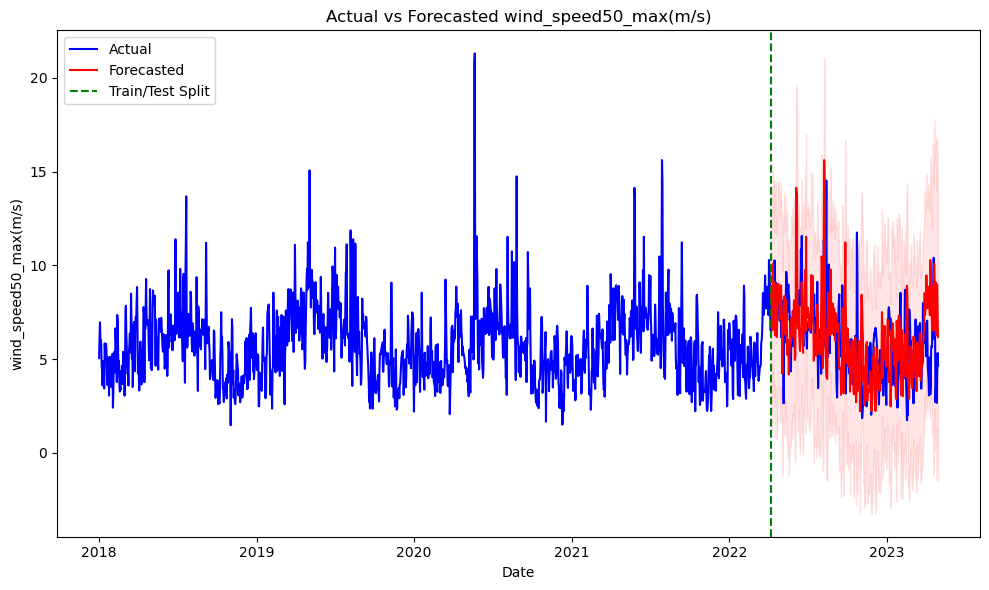

In [23]:
# Get the forecast for the test period
sarima_test_forecast6 = sarima_model_fit6.get_forecast(steps=len(test_data))
forecast_values_6 = sarima_test_forecast6.predicted_mean

# Get confidence intervals if needed
forecast_ci6 = sarima_test_forecast6.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['wind_speed50_max(m/s)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_6, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci6.iloc[:, 0],  # Lower bound
                 forecast_ci6.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('wind_speed50_max(m/s)')
plt.title('Actual vs Forecasted wind_speed50_max(m/s)')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse3 = np.sqrt(mean_squared_error(test_data['wind_speed50_max(m/s)'], forecast_values_6))
print(f"RMSE for temp2_max(c): {rmse3}")

RMSE for temp2_max(c): 2.361187304478707


### wind_speed50_min(m/s)

In [6]:
ts_data7 = train_data["wind_speed50_min(m/s)"]

In [7]:
adf_test(ts_data7)
kpss_test(ts_data7)
pp_test(ts_data7)

Results of Dickey-Fuller Test:
Test Statistic                   -5.184596
p-value                           0.000009
#Lags Used                       10.000000
Number of Observations Used    1504.000000
Critical Value (1%)              -3.434705
Critical Value (5%)              -2.863464
Critical Value (10%)             -2.567794
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic            0.126507
p-value                   0.100000
#Lags Used               22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -5.192379
p-value                           0.000091
#Lags Used                       10.000000
Number of Observations Used    1504.000000
Critical Value (1%)              -3.964802
Cr

C:\Users\Idea\AppData\Local\Temp\ipykernel_21248\3899675180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


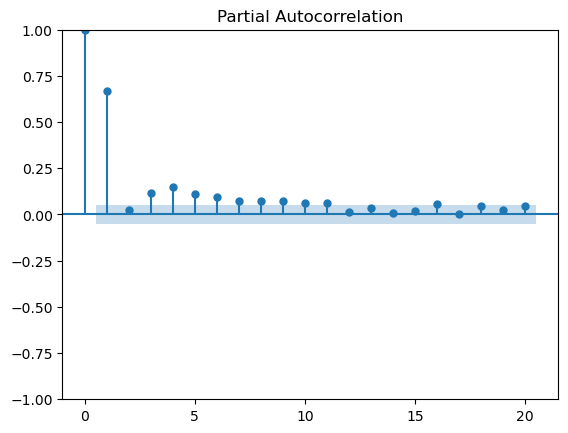

In [8]:
plot_pacf(ts_data7, lags=20)
plt.show()

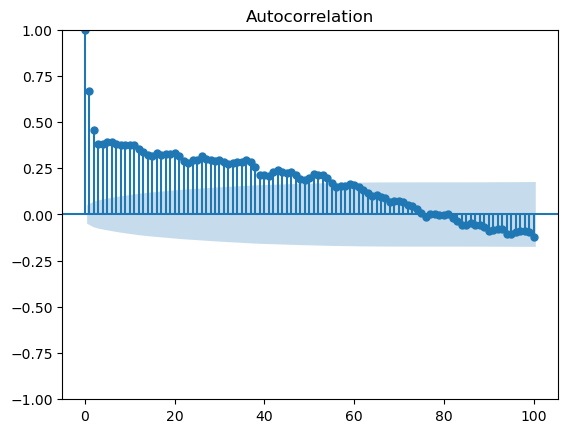

In [9]:
plot_acf(ts_data7, lags=100)
plt.show()

In [10]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days1 = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days1.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147,9727
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998,10529
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539,10186
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629,10093
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812,10264


In [14]:
# Fit the SARIMA model
sarima_model7 = SARIMAX(train_data_last_730_days1['wind_speed50_min(m/s)'], order=(2, 0, 3), seasonal_order=(0, 1, 0, 365))
sarima_model_fit7 = sarima_model7.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit7.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                wind_speed50_min(m/s)   No. Observations:                  730
Model:             SARIMAX(2, 0, 3)x(0, 1, [], 365)   Log Likelihood                -714.389
Date:                              Tue, 06 May 2025   AIC                           1440.778
Time:                                      02:09:37   BIC                           1464.177
Sample:                                           0   HQIC                          1450.077
                                              - 730                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4776      0.372      1.283      0.199      -0.252       1.207
ar.L2          0.41

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


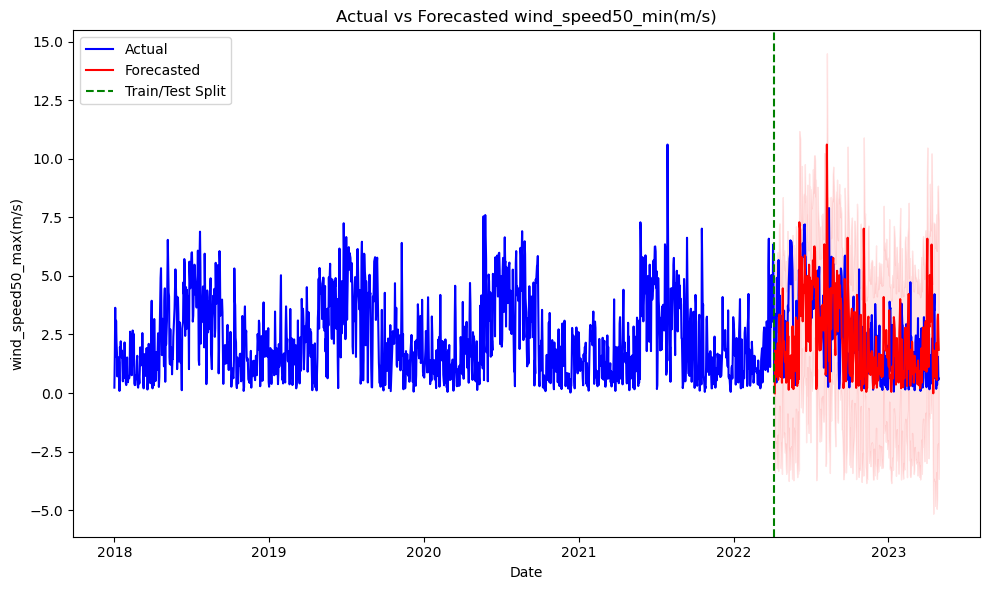

In [15]:
# Get the forecast for the test period
sarima_test_forecast7 = sarima_model_fit7.get_forecast(steps=len(test_data))
forecast_values_7 = sarima_test_forecast7.predicted_mean

# Get confidence intervals if needed
forecast_ci7 = sarima_test_forecast7.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['wind_speed50_min(m/s)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_7, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci7.iloc[:, 0],  # Lower bound
                 forecast_ci7.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('wind_speed50_max(m/s)')
plt.title('Actual vs Forecasted wind_speed50_min(m/s)')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse3 = np.sqrt(mean_squared_error(test_data['wind_speed50_min(m/s)'], forecast_values_7))
print(f"RMSE for wind_speed50_min(m/s): {rmse3}")

RMSE for wind_speed50_min(m/s): 2.0640851398558993
